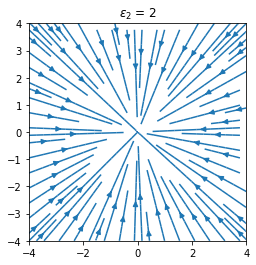

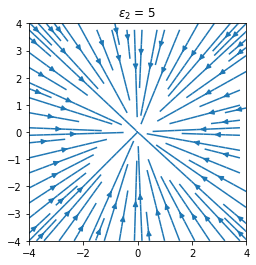

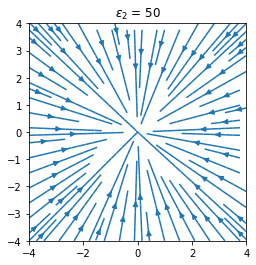

In [44]:
import numpy as np
import matplotlib.pyplot as plt


y = z = np.linspace(-4,4,200)
ry, rz = np.meshgrid(y,z)
eps0 = 8.85e-12

q = 1
d = 1

##hier kann eine beliebige der beiden Formeln genommen werden, da das Feld in der xy Ebene stetig ist
def potential(y,z,eps2):
    fac = 1/(4*np.pi*eps0) 
    r1 = (y**2+(z-d)**2)**(-3/2)
    r2 = (y**2+(z+d)**2)**(-3/2)
    return 1/4*np.pi*eps0 * ((q / np.sqrt(x**2 + y**2)) - (-q * ((1 - eps2) / (1 + eps2))) / np.sqrt(x**2 + y**2))

'''
Hier ist der Fehler. 
Du plottest die x-y-Ebene (also implizit bei z = 0), 
also die genau das E-Feld parallel zur Grenzfläche an der Stelle der Grenzfläche
Dort wirst du keine qualitative Änderung des Feldes sehen 
(es wird quantitativ aber schwächer, je größer eps2 wird, das sieht man in dem streamplot natürlich nicht)
Die Änderungen geschehen rechts und links von der Grenzfläche, also solltest du die x-z oder y-z Ebene plotten
Muster-Lösung siehe unten
'''

pot = [potential(rx,ry,2),potential(rx,ry,5),potential(rx,ry,50)]


dy_phi1, dx_phi1 = np.gradient(pot[0])
dy_phi2, dx_phi2 = np.gradient(pot[1])
dy_phi3, dx_phi3 = np.gradient(pot[2])

feldx1 = dx_phi1 * pot[0]
feldy1 = dy_phi1 * pot[0]

feldx2 = dx_phi2 * pot[1]
feldy2 = dy_phi2 * pot[1]

feldx3 = dx_phi3 * pot[2]
feldy3 = dy_phi3 * pot[2]

plt.axes().set_aspect('equal')
plt.title('$\epsilon_2$ = 2')
plt.streamplot(rx,ry,feldx1,feldy1)
plt.clabel(CS)
plt.show()

plt.axes().set_aspect('equal')
plt.title('$\epsilon_2$ = 5')
plt.streamplot(rx,ry,feldx2,feldy2)
plt.clabel(CS)
plt.show()

plt.axes().set_aspect('equal')
plt.title('$\epsilon_2$ = 50')
plt.streamplot(rx,ry,feldx3,feldy3)
plt.clabel(CS)
plt.show()

###ändert sich nichts :(

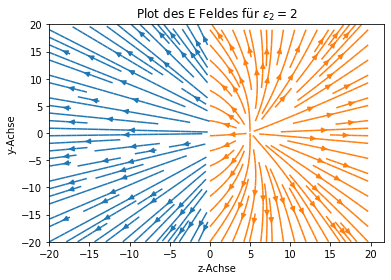

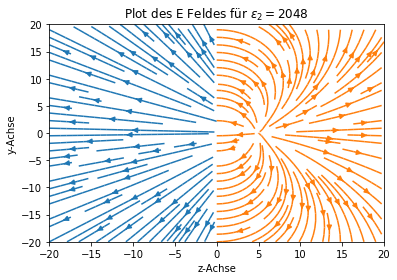

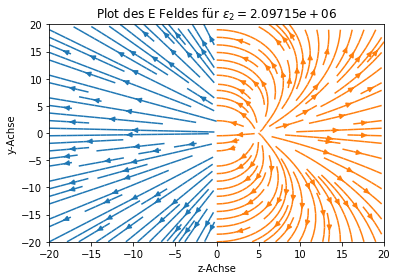

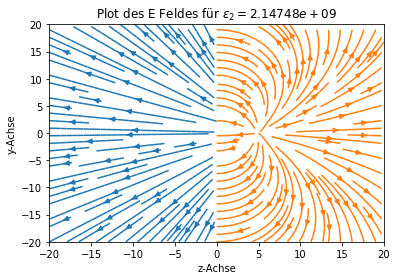

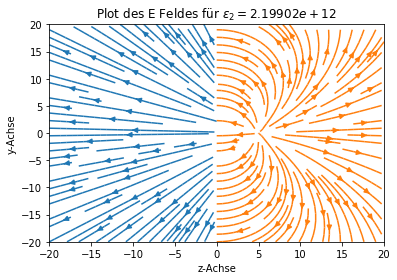

In [2]:
"""
Plot von Lars Stutzer
"""

import numpy as np
import matplotlib.pyplot as plt

epsilon = np.array([2**n for n in range(1, 50, 10)])

q = 1 #Da q frei zu definieren ist, wähle ich einfach 1
d = 5 # -||-
e0 = 8.85e-12


def phi1(y, z, e):
    """
    Funktion für z<0.
    Definiere die Konstanten mit e=epsilon2
    """
    k = 1/(4*np.pi*e0*e)
    q2 = q*2*e/(1+e)
    return k*q2*1/np.sqrt(y**2+(z-d)**2)

def phi2(y, z, e):
    """
    Funktion für z>0
    """
    k = 1/(4*np.pi*e0)
    q1 = (1-e)/(e+1)*q
    return k*(q/np.sqrt(y**2+(z-d)**2) + q1/np.sqrt(y**2+(z+d)**2))
    

"""
Definiere Meshgrid für z<0
"""
y1 = np.linspace(-20, 20, 100)
z1 = np.linspace(-20, 0, 50)

rz1, ry1 = np.meshgrid(z1, y1)
    
"""
Definiere Meshgrid für z>0
"""
y2 = np.linspace(-20, 20, 100)
z2 = np.linspace(0, 20, 50)

rz2, ry2 = np.meshgrid(z2, y2)




for i in epsilon:
    """
    Elektrische Felder
    """
    Ey1, Ez1  = np.gradient(phi1(ry1, rz1, i))
    Ey2, Ez2  = np.gradient(phi2(ry2, rz2, i))

    Ey1 *= -1
    Ez1 *= -1
    Ey2 *= -1
    Ez2 *= -1
    
    """
    Plots
    """
    
    plt.streamplot(rz1, ry1, Ez1, Ey1)
    plt.streamplot(rz2, ry2, Ez2, Ey2)
    plt.title(r"Plot des E Feldes für $\epsilon_2 = %g$" % i)
    plt.xlabel("z-Achse")
    plt.ylabel("y-Achse")
    
    
    
    plt.show()

